In [1]:
import numpy as np
import pandas as pd

# Load feature matrix
from dataIO.loader import loadTrainingDataFeatures, createSubSet
from vizTools.hdPlot import visualize2D, visualize3D
iD, X = loadTrainingDataFeatures(isNormalized=True)

In [2]:
print(iD)
print(iD.size)
print(X)
print(X.shape)
#X = [1_Substrate] + [2_Base or Conjugate] + [3_Hydroxyamine or Oxoammonium] + [4_Anti or Syn Ligand]
#ID:



[['Sub-A_CA-A_Hyd-A_LigS-A']
 ['Sub-A_CA-A_Hyd-A_LigS-B']
 ['Sub-A_CA-A_Hyd-A_LigS-C']
 ...
 ['Sub-AC_Base-E_Oxo-F_LigA-D']
 ['Sub-AC_Base-E_Oxo-F_LigA-E']
 ['Sub-AC_Base-E_Oxo-F_LigA-F']]
41760
[[-7.24498693e-01 -7.55462047e-01 -2.62020539e-01 ...  8.95951640e-01
  -3.28329459e-01  3.46483461e-01]
 [-7.24498693e-01 -7.55462047e-01 -2.62020539e-01 ...  1.65038990e+00
  -2.18564586e+00 -1.81874912e+00]
 [-7.24498693e-01 -7.55462047e-01 -2.62020539e-01 ...  5.49305691e-01
  -1.22838386e-03  6.76394299e-01]
 ...
 [-1.05197923e+00  1.52116379e+00 -1.11419949e+00 ... -1.87182068e+00
   3.63075174e-01  5.76187736e-01]
 [-1.05197923e+00  1.52116379e+00 -1.11419949e+00 ... -1.08770845e+00
   6.50166031e-01  4.23565433e-01]
 [-1.05197923e+00  1.52116379e+00 -1.11419949e+00 ...  7.11163721e-01
   1.28541597e+00  1.19477056e-02]]
(41760, 32)


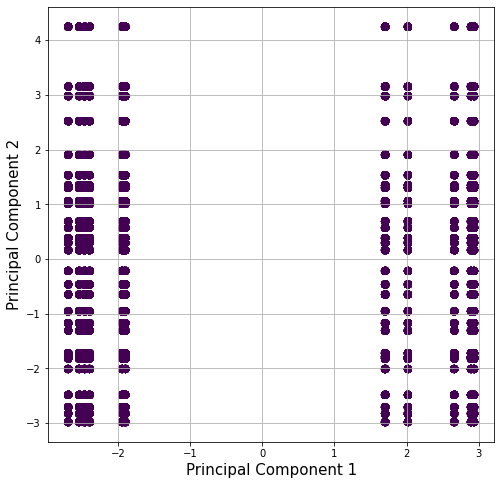

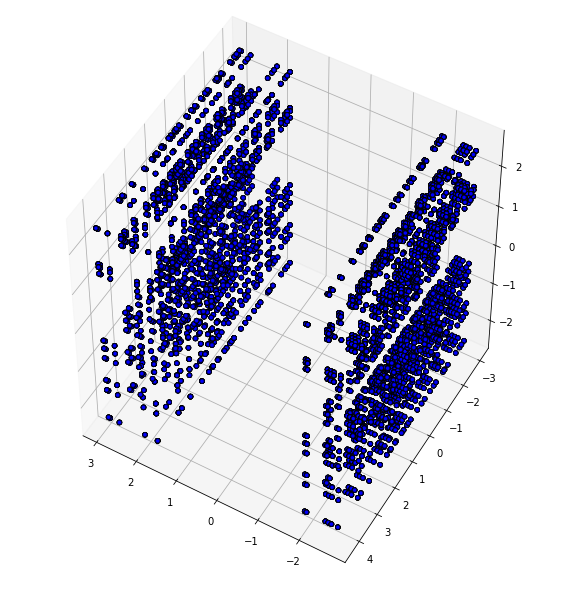

In [3]:
visualize2D(X)
visualize3D(X)

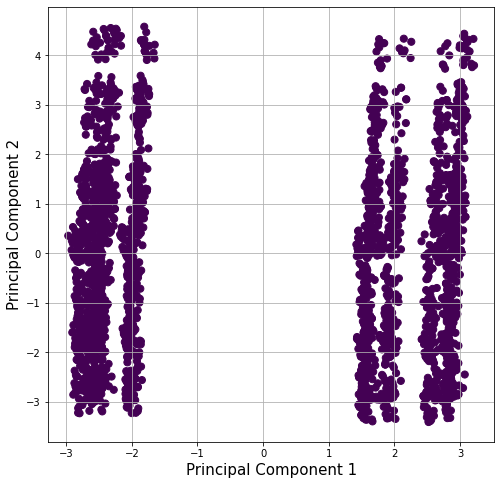

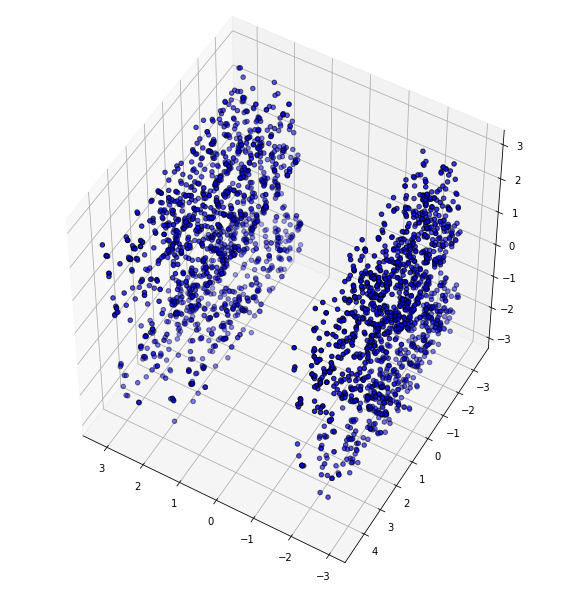

In [4]:
X1, idX1 = createSubSet(X, 3000)
iD1 = iD[idX1]
visualize2D(X1)
visualize3D(X1)


(3000, 32)
[1 0 0 ... 0 1 1]
[[-6.95376104e-02 -7.22467470e-01 -2.92455502e-01  1.08365677e-01
   3.08099627e-01 -7.79142502e-01 -2.19865768e-01  1.16818779e-01
  -1.05490282e-01 -3.47290268e-03 -1.16887229e+00 -4.04826766e-01
  -6.10765685e-01 -1.84143138e-01 -1.14333335e+00 -1.17802268e+00
  -3.14261357e-01 -3.71944244e-01 -1.20661754e-02 -6.90082054e-01
  -9.98820498e-01 -1.03718608e+00  1.03855895e+00  1.03664131e+00
   1.07006267e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.05861274e+00 -7.94115962e-01  1.79168561e-01 -2.05423454e-01]
 [ 3.78593656e-01  4.32342738e-01 -2.41730564e-01 -2.67211010e-01
  -6.79774948e-02  1.14504447e+00 -2.71361052e-01  1.83738538e-02
  -3.74111859e-01 -3.47290268e-03 -1.16887229e+00 -4.04826766e-01
  -6.10765685e-01 -1.84143138e-01 -1.14333335e+00 -1.17802268e+00
  -3.14261357e-01 -3.71944244e-01 -1.20661754e-02 -6.90082054e-01
  -9.98820498e-01 -1.03718608e+00  1.03855895e+00  1.03664131e+00
   1.07006267e+00  0.00000000e+00  0.00000000e

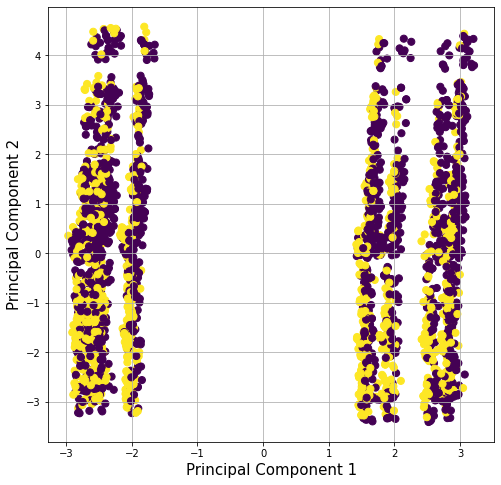

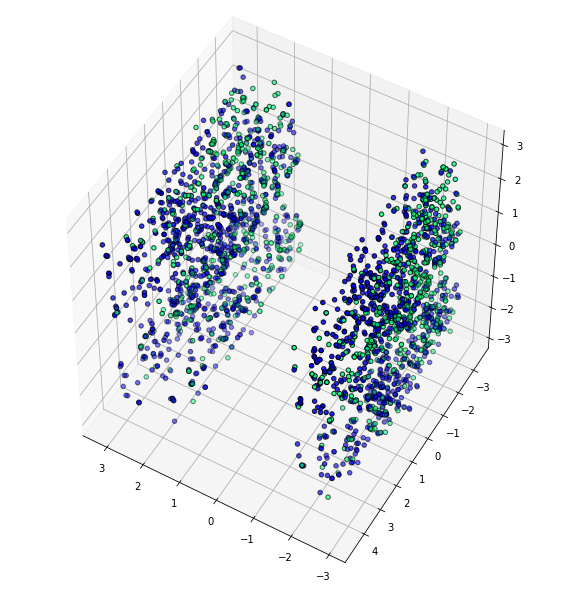

In [5]:
print(X1.shape)
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X1)
print(kmedoids.labels_)
print(kmedoids.cluster_centers_)

visualize2D(X1, kmedoids.labels_)
visualize3D(X1, kmedoids.labels_)

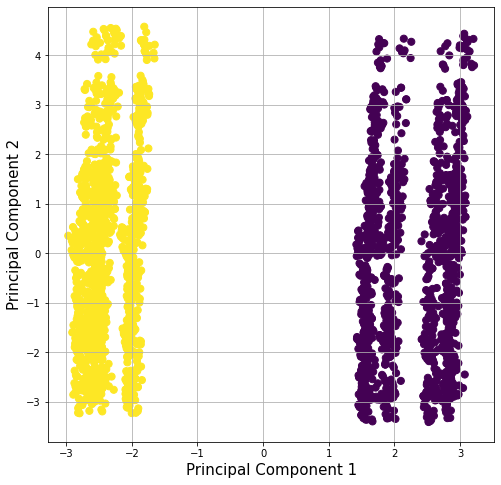

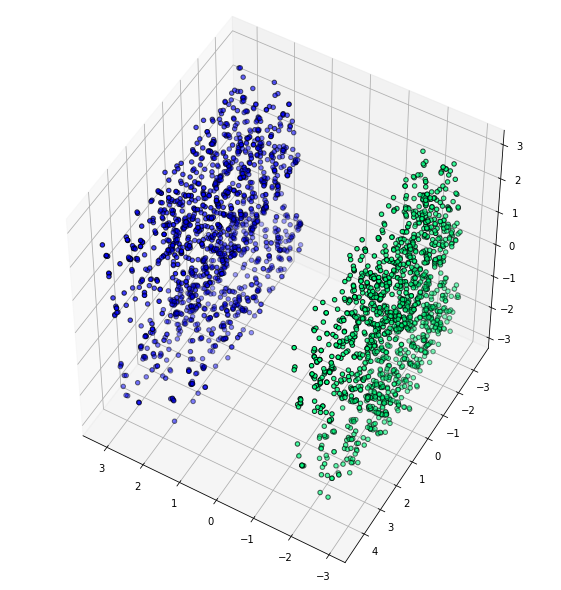

In [9]:
from sklearn.cluster import KMeans
km = KMeans(2)
clusts = km.fit_predict(X1)
visualize2D(X1, clusts)
visualize3D(X1, clusts)

In [7]:
# Export clustering results to file
idx = np.arange(0, X1.shape[0], 1)
idx0 = idx[clusts==0]
idx1 = idx[clusts==1]

print(iD[idx0].shape, iD[idx1].shape)
df1 = pd.DataFrame(data = iD1[idx0],columns={'id'})
df1["cluster"] = clusts[idx0]
df2 = pd.DataFrame(data = iD1[idx1],columns={'id'})
df2["cluster"] = clusts[idx1]
df = pd.concat([df1,df2])
df.to_csv('clusters.csv', index=False)
df.head()

(118, 1) (525, 1)


,id,cluster
0,Sub-E_CA-D_Oxo-B_LigA-E,0
1,Sub-E_CA-E_Hyd-F_LigA-E,0
2,Sub-E_Base-E_Oxo-D_LigA-E,0
3,Sub-E_CA-A_Hyd-A_LigA-A,0
4,Sub-E_CA-E_Hyd-D_LigA-E,0


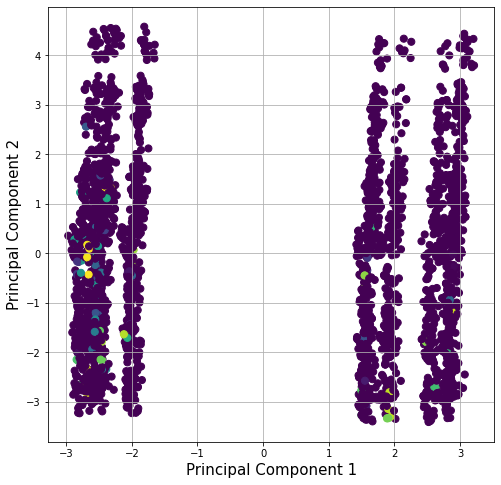

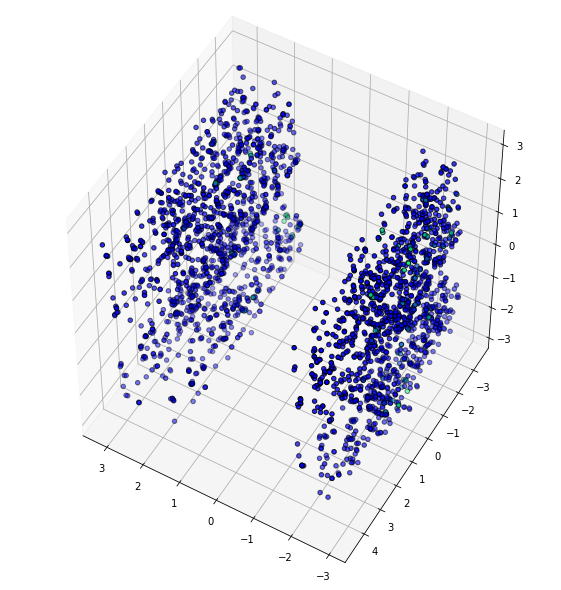

In [8]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, min_samples=3).fit(X1)

visualize2D(X1, dbscan.labels_)
visualize3D(X1, dbscan.labels_)
